In [ ]:
import os

In [1]:
!pip install h5py

In [4]:
import h5py

with h5py.File('/content/UrbanSound8kMFCC.h5py', 'r') as hdf_file:
    # List all the datasets in the HDF5 file/UrbanSound8kMFCC.h5py
    print("Datasets in the HDF5 file:", list(hdf_file.keys()))

    # Access the 'X' dataset
    X_dataset = hdf_file['X']

    # Access the 'y' dataset
    y_dataset = hdf_file['y']

    # Now, you can work with the datasets as NumPy arrays
    X_data = X_dataset[:]
    y_data = y_dataset[:]

    print("Shape of the 'X' dataset:", X_data.shape)
    print("Shape of the 'y' dataset:", y_data.shape)

Datasets in the HDF5 file: ['X', 'y']
Shape of the 'X' dataset: (8732, 40)
Shape of the 'y' dataset: (8732,)


In [5]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

# Normalize the input features
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=X_train.shape[1:]),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')  # Assuming 10 classes
])

In [6]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test accuracy:", test_accuracy)

Epoch 1/50
175/175 [==============================] - 1s 2ms/step - loss: 2.1150 - accuracy: 0.2357 - val_loss: 1.8733 - val_accuracy: 0.3228
Epoch 2/50
175/175 [==============================] - 0s 2ms/step - loss: 1.7667 - accuracy: 0.3715 - val_loss: 1.6353 - val_accuracy: 0.4338
Epoch 3/50
175/175 [==============================] - 0s 2ms/step - loss: 1.5973 - accuracy: 0.4408 - val_loss: 1.5068 - val_accuracy: 0.4996
Epoch 4/50
175/175 [==============================] - 0s 2ms/step - loss: 1.4919 - accuracy: 0.4814 - val_loss: 1.4460 - val_accuracy: 0.5225
Epoch 5/50
175/175 [==============================] - 0s 2ms/step - loss: 1.4256 - accuracy: 0.5089 - val_loss: 1.3673 - val_accuracy: 0.5648
Epoch 6/50
175/175 [==============================] - 0s 2ms/step - loss: 1.3577 - accuracy: 0.5361 - val_loss: 1.3295 - val_accuracy: 0.5755
Epoch 7/50
175/175 [==============================] - 0s 2ms/step - loss: 1.3186 - accuracy: 0.5531 - val_loss: 1.2935 - val_accuracy: 0.5877
Epoch 

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               5248      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 14154 (55.29 KB)
Trainable params: 14154 (55.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


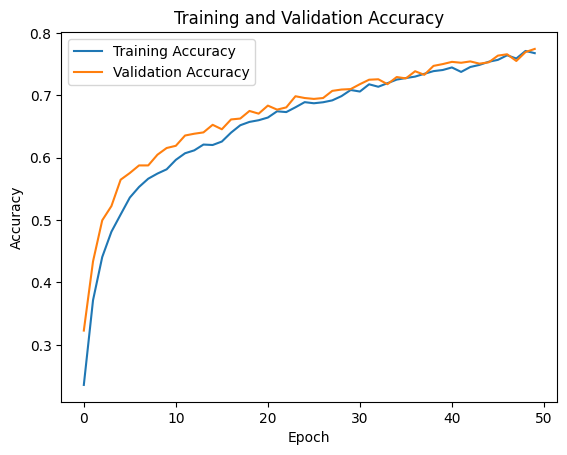

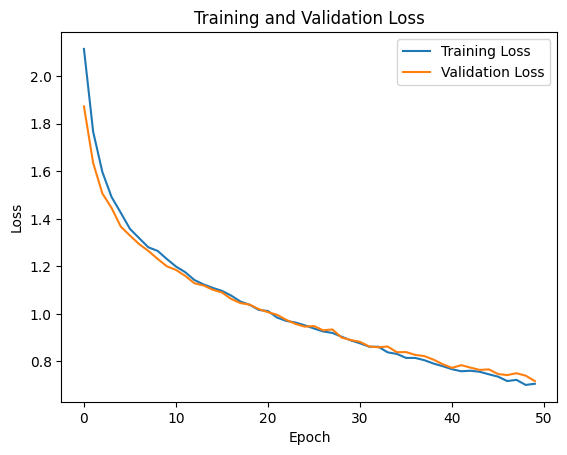

In [8]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy curves
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss curves
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()